# Imports

In [1]:
!pip uninstall -y resampy librosa
!pip install resampy librosa


Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
Found existing installation: librosa 0.11.0
Uninstalling librosa-0.11.0:
  Successfully uninstalled librosa-0.11.0
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)


In [2]:
# Basic Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Music Imports
import librosa
import librosa.display

# Keras Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

2025-08-10 22:32:30.879618: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-10 22:32:30.888817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-10 22:32:30.980825: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-10 22:32:31.055152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754845351.142454  347768 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754845351.16

# Load Dataset


In [ ]:
train_csv = pd.read_csv('/home/prashant/Audio-Sentiment-Analysis-Using-Deep-Learning-CNN/kaggle/TRAIN.csv')
train_audio_path = '/kaggle/input/audio-speech-sentiment/TRAIN/'
test_audio_path = '/kaggle/input/audio-speech-sentiment/TEST/'

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/audio-speech-sentiment/TRAIN.csv'

# Data Preprocessing

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

features = []
labels = []

for index, row in train_csv.iterrows():
    file_path = os.path.join(train_audio_path, row['Filename'])
    data = extract_features(file_path)
    features.append(data)
    labels.append(row['Class'])

In [ ]:
# # 🚀 View after processing all data
# print(f"\n--- Final Data (Last Audio Processed) ---\n{data}")
# print(f"\n--- All Features (List) ---\n{features}")
# print(f"\n--- All Labels (List) ---\n{labels}")

# Audio EDA

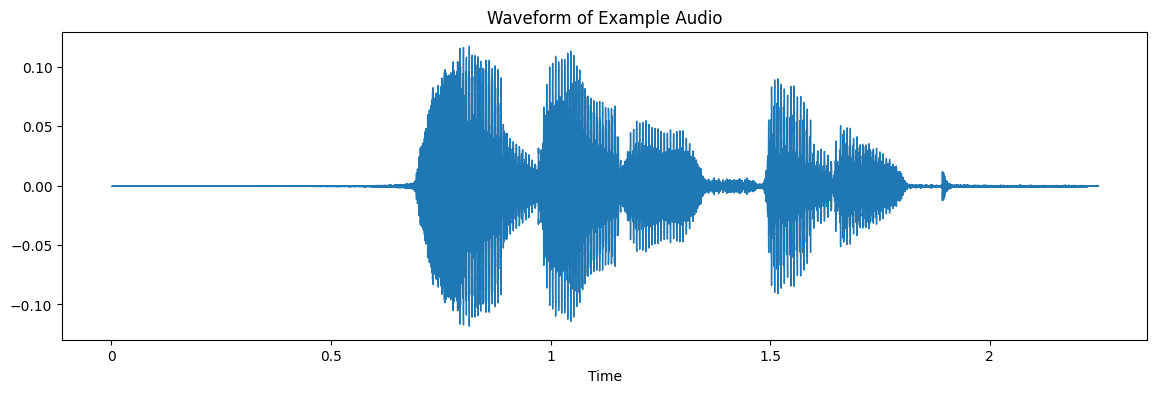

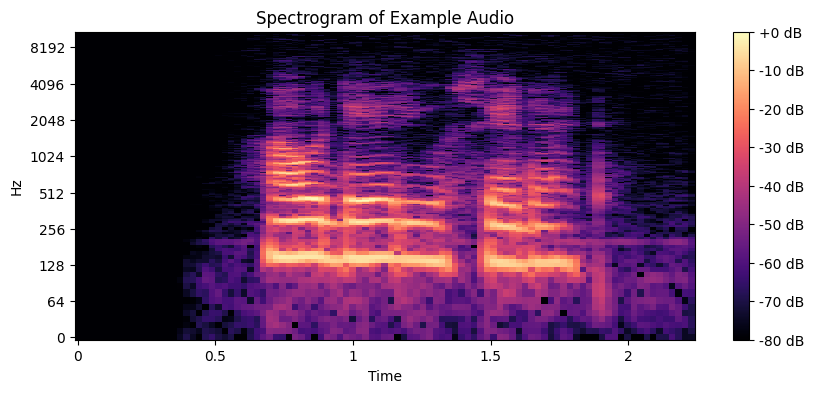

In [ ]:
# Example Audio Visualization
example_audio = os.path.join(train_audio_path, train_csv['Filename'].iloc[0])
audio, sr = librosa.load(example_audio)

# Waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of Example Audio')
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Example Audio')
plt.show()


# Train Test Split

In [ ]:
X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Building CNN For Audio Sentiment

In [ ]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_val = X_val.reshape(X_val.shape[0], 40, 1, 1)

# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(40, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.3927 - loss: 13.4608 - val_accuracy: 0.3800 - val_loss: 4.5278
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4363 - loss: 8.4403 - val_accuracy: 0.7200 - val_loss: 2.0425
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5413 - loss: 5.4685 - val_accuracy: 0.6200 - val_loss: 2.8669
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6318 - loss: 4.3128 - val_accuracy: 0.8400 - val_loss: 0.7693
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6647 - loss: 1.9561 - val_accuracy: 0.8600 - val_loss: 0.2779
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6143 - loss: 1.4746 - val_accuracy: 0.8800 - val_loss: 0.2607
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6566 - loss: 1.0762 - val_accuracy: 0.9200 - val_loss: 0.3011
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6837 - loss: 0.6590 - val_accuracy: 0.8800 - val_loss: 0.3218
Epoch

# Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8442 - loss: 0.2679 
Validation Loss: 0.2498
Validation Accuracy: 0.8600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.67      0.74        15
     Neutral       1.00      1.00      1.00        20
    Positive       0.72      0.87      0.79        15

    accuracy                           0.86        50
   macro avg       0.85      0.84      0.84        50
weighted avg       0.87      0.86      0.86        50



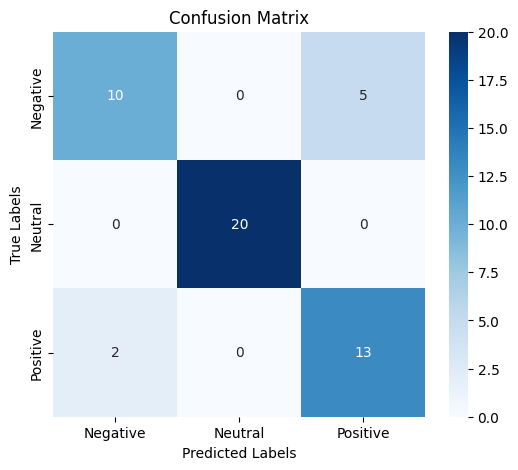

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict Classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report 📊
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix 📉
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Prediction System

In [ ]:
import numpy as np
import librosa
from IPython.display import Audio  # For playing audio

# Detection System
def predict_sentiment(audio_path):
    feature = extract_features(audio_path)         # Extract MFCC features
    feature = feature.reshape(1, 40, 1, 1)         # Reshape for CNN input
    prediction = model.predict(feature)            # Predict sentiment
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

In [ ]:
# Test Audio Path
audio_path = '/kaggle/input/audio-speech-sentiment/TEST/112.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
🎯 Predicted Sentiment: Positive


In [ ]:
# Test Audio Path
audio_path = '/kaggle/input/audio-speech-sentiment/TEST/113.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
🎯 Predicted Sentiment: Negative


In [ ]:
# Test Audio Path
audio_path = '/kaggle/input/audio-speech-sentiment/TEST/142.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
🎯 Predicted Sentiment: Neutral


In [ ]:
# Test Audio Path
audio_path = '/kaggle/input/audio-speech-sentiment/TRAIN/114.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
🎯 Predicted Sentiment: Positive


# Save Files

In [ ]:
import joblib

# Save the trained model
model.save('sentiment_cnn_model.h5')

# Save the Label Encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']